<h1 align="center"> Machine Learning: Assignment 1</h1><br>

In [327]:
%matplotlib inline
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pylab import rcParams

<h2 align="center"> Problem 1</h2><br>

<strong><p style="font-size:120%;"></strong> Download the Weather data set (a simple data set describing whether or not to play tennis based on the weather conditions)

In [328]:
weather = pd.read_csv('data/weather_dataset.csv')

<strong></strong> Represent the following table using 
a data structure of your choice



In [329]:
weather

,Day,outlook,temperature,humidity,windy,play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,70,False,yes
9,10,rainy,75,80,False,yes


In [330]:
#check the datatypes of each column 
weather.dtypes

Day             int64
outlook        object
temperature     int64
humidity        int64
windy            bool
play           object
dtype: object

<ul>
  <li>Calculate the mean temperature and mean humidity</li>
  <li>Print outlook and play for 
those days where the temperature is greater than the 
average temperature</li>
  <li>Print outlook and play for those days where the humidity is greater than the 
average humidity</li>
  <li>Convert the temperature
to Celsius and add a new column therefore in the table. 
Use the following conversion equation</li>C = (F-32) *5/9
</ul>

In [331]:
mean_temp = np.sum(weather.temperature.values) / float(len(weather.temperature.values))
mean_humid = np.sum(weather.humidity.values) / float(len(weather.humidity.values))

print 'mean temperature: ', mean_temp
print 'mean humid: ', mean_humid

mean temperature:  73.5714285714
mean humid:  81.6428571429


Print outlook and play for those days where the temperature is greater than the average temperature

In [332]:
temp_condition = weather['temperature'] > mean_temp

great_mean_temp = weather[['Day','outlook']][temp_condition]
pd.DataFrame(great_mean_temp)

,Day,outlook
0,1,sunny
1,2,sunny
2,3,overcast
9,10,rainy
10,11,sunny
12,13,overcast


Print outlook and play for those days where the humidity is greater than the average humidity

In [333]:
humid_condition = weather['humidity'] > mean_humid

great_mean_humid = weather[['Day','outlook']][humid_condition]
pd.DataFrame(great_mean_humid)

,Day,outlook
0,1,sunny
1,2,sunny
2,3,overcast
3,4,rainy
7,8,sunny
11,12,overcast
13,14,rainy


Convert the temperature
to Celsius and add a new column therefore in the table. 
Use the following conversion equation 
C = (F-32) *5/9 

In [334]:
weather['Celsius'] = weather['temperature'].apply(lambda x:(x -32.0) *5.0/9)
weather

,Day,outlook,temperature,humidity,windy,play,Celsius
0,1,sunny,85,85,False,no,29.444444
1,2,sunny,80,90,True,no,26.666667
2,3,overcast,83,86,False,yes,28.333333
3,4,rainy,70,96,False,yes,21.111111
4,5,rainy,68,80,False,yes,20.000000
5,6,rainy,65,70,True,no,18.333333
6,7,overcast,64,65,True,yes,17.777778
7,8,sunny,72,95,False,no,22.222222
8,9,sunny,69,70,False,yes,20.555556
9,10,rainy,75,80,False,yes,23.888889


<strong><p style="font-size:120%;">1.</strong> How often do you play tennis independent of the other attributes?

In [335]:
def NoString(x):
    if x == 'no':
        y = 0
    else:
        y = 1.0
    return y

weather.play = weather.play.apply(NoString)
print weather.play.sum()/float(len(weather.play))
weather.play.head(15)

0.642857142857


0     0.0
1     0.0
2     1.0
3     1.0
4     1.0
5     0.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    0.0
Name: play, dtype: float64

<strong><p style="font-size:120%;">2.</strong> How often do you play tennis when it is &quot;sunny&quot;?

In [336]:
#data.groupby('month')['date'].count()
len(weather[(weather['outlook'] == 'sunny') & (weather['play'] == 1)]) / float(len(weather))
#weather[weather.outlook == 'sunny'].play

0.14285714285714285

<strong><p style="font-size:120%;">3.</strong> Compare the average, minimum and maximum temperature when you play tennis?

In [337]:
weather

,Day,outlook,temperature,humidity,windy,play,Celsius
0,1,sunny,85,85,False,0.0,29.444444
1,2,sunny,80,90,True,0.0,26.666667
2,3,overcast,83,86,False,1.0,28.333333
3,4,rainy,70,96,False,1.0,21.111111
4,5,rainy,68,80,False,1.0,20.000000
5,6,rainy,65,70,True,0.0,18.333333
6,7,overcast,64,65,True,1.0,17.777778
7,8,sunny,72,95,False,0.0,22.222222
8,9,sunny,69,70,False,1.0,20.555556
9,10,rainy,75,80,False,1.0,23.888889


In [338]:
print 'mean:', weather[(weather['play'] == 1)]['temperature'].mean()
print 'min:', weather[(weather['play'] == 1)]['temperature'].min()
print 'max:', weather[(weather['play'] == 1)]['temperature'].max()

mean: 73.0
min: 64
max: 83


<strong><p style="font-size:120%;">4.</strong> Compare the average, minimum and maximum humidity when you play tennis?

In [339]:
print 'mean:', weather[(weather['play'] == 1)]['humidity'].mean()
print 'min:', weather[(weather['play'] == 1)]['humidity'].min()
print 'max:', weather[(weather['play'] == 1)]['humidity'].max()

mean: 79.1111111111
min: 65
max: 96


<strong><p style="font-size:120%;">5.</strong> Plot a scatter plot (x,y diagramm) of humidity (x) and temperature (y) when you play tennis compared to when you do not play tennis. 

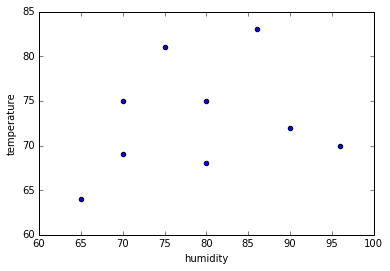

In [340]:
#play tennis 
weather[(weather['play'] == 1)].plot(kind='scatter', x='humidity', y='temperature')

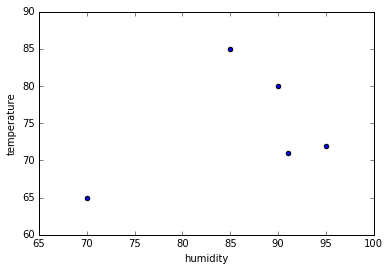

In [341]:
# NO tennis 
weather[(weather['play'] == 0)].plot(kind='scatter', x='humidity', y='temperature')

<h2 align="center"> Problem 2</h2><br>

<strong><p style="font-size:120%;">Question</strong> What problems did you have to deal with when working with these files? 

Most of these files were uniquely different from each other and because of that, it was difficult to automate cleaning of the files using in my case bash and python. Also some of the files had the population in thousands while others had the actual population.I  automated the place where WY, US or U.S., and AL occured (in the bash script "getLineNum.sh") in each text file to selectively get where the data tables start and stop for the "sed" command. 

In [342]:
import os 

# This cell helps with using sed later to get where to trim the files
data = ["data/st0009ts.txt", "data/st1019ts.txt",\
         "data/st2029ts.txt", "data/st3039ts.txt",\
         "data/st4049ts.txt", "data/st5060ts.txt",\
         "data/st6070ts.txt", "data/st7080ts.txt",\
         "data/st8090ts.txt"]

#each tuple is roughly location of the WY, US or (U.S.)*, and AL line occurrence
# *US is optional
start_end_lines = [(72, 18, 24), (72, 18, 24), (72,18,24), (72, 18, 24),\
                  (70,16,22), (78, 19, 28), (75,19,25), \
                   (66,15),(62,12)]

In [343]:
for index, data_file in enumerate(data):
    start_line, end_line = np.min(start_end_lines[index]), np.max(start_end_lines[index])
    try:
        os.remove('data/1st0009ts.txt')
    except:
        pass
    !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt

    if index == 0:
        df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        df = df.dropna()
    else:
        new_df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        new_df = new_df.dropna()
        if index == 5:
            new_df.columns = ['1950', '1950.1', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960']
        if index == 7:
            new_df.drop('Fip', axis=0, inplace=True)
            new_df.index = new_df['Unnamed: 1'].values
            new_df.drop('Unnamed: 1', axis=1, inplace=True)
            new_df.columns = [str(1970 + i) for i in xrange(0,11)]
        if index == 8:
            new_df.columns = [str(1980 + i) for i in xrange(0,11)]      
        df = pd.concat([df, new_df], axis=1)
    if index == 6:
        df.rename(index={'U.S.': 'US'}, inplace=True)
        df = df.apply(lambda x: x*1000) #every index before index 6, has population in thousands
        
df = df.fillna(float(0.0)) #Changing the NaN's to zero to indicate no measurement
df = df.transpose() #want the columns to be states for ease of graphing
df = df.astype('float')
df

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TX,US,UT,VA,VT,WA,WI,WV,WY,West
1900,0.0,1830000.0,1314000.0,124000.0,1490000.0,543000.0,910000.0,278000.0,185000.0,530000.0,...,3055000.0,76094000.0,277000.0,1858000.0,344000.0,523000.0,2072000.0,959000.0,93000.0,4112000.0
1901,0.0,1907000.0,1341000.0,131000.0,1550000.0,581000.0,931000.0,285000.0,187000.0,544000.0,...,3132000.0,77585000.0,284000.0,1887000.0,347000.0,583000.0,2109000.0,972000.0,100000.0,4351000.0
1902,0.0,1935000.0,1360000.0,138000.0,1623000.0,621000.0,952000.0,290000.0,188000.0,565000.0,...,3210000.0,79160000.0,292000.0,1894000.0,349000.0,651000.0,2141000.0,1000000.0,105000.0,4620000.0
1903,0.0,1957000.0,1384000.0,144000.0,1702000.0,652000.0,972000.0,295000.0,190000.0,587000.0,...,3291000.0,80632000.0,299000.0,1890000.0,350000.0,719000.0,2171000.0,1037000.0,108000.0,4882000.0
1904,0.0,1978000.0,1419000.0,151000.0,1792000.0,659000.0,987000.0,302000.0,192000.0,599000.0,...,3374000.0,82165000.0,308000.0,1889000.0,353000.0,782000.0,2202000.0,1064000.0,111000.0,5127000.0
1905,0.0,2012000.0,1447000.0,158000.0,1893000.0,680000.0,1010000.0,308000.0,194000.0,615000.0,...,3459000.0,83820000.0,316000.0,1917000.0,354000.0,842000.0,2231000.0,1094000.0,114000.0,5398000.0
1906,0.0,2045000.0,1465000.0,167000.0,1976000.0,707000.0,1033000.0,313000.0,196000.0,628000.0,...,3546000.0,5437000.0,327000.0,1942000.0,355000.0,904000.0,2250000.0,1122000.0,118000.0,5671000.0
1907,0.0,2058000.0,1484000.0,176000.0,2054000.0,733000.0,1057000.0,317000.0,197000.0,645000.0,...,3636000.0,87000000.0,339000.0,1952000.0,355000.0,967000.0,2268000.0,1149000.0,125000.0,5934000.0
1908,0.0,2070000.0,1513000.0,186000.0,2161000.0,757000.0,1077000.0,321000.0,199000.0,684000.0,...,3727000.0,88709000.0,351000.0,1994000.0,354000.0,1028000.0,2292000.0,1174000.0,133000.0,6234000.0
1909,0.0,2108000.0,1545000.0,196000.0,2282000.0,775000.0,1097000.0,327000.0,201000.0,724000.0,...,3821000.0,90492000.0,363000.0,2038000.0,356000.0,1091000.0,2317000.0,1203000.0,141000.0,6557000.0


<strong><p style="font-size:120%;"></strong> Plot the populations of Alaska and California over time. Don’t forget to label your axes.

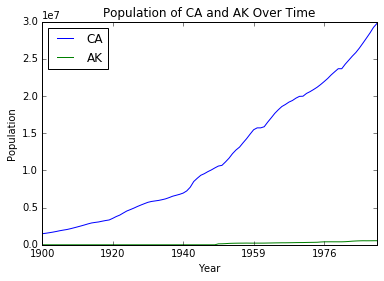

In [344]:
ax = df[["CA", "AK"]].plot()
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Population of CA and AK Over Time")

<strong><p style="font-size:120%;"></strong> Plot the population of New England and the Southwest over time. Don’t forget to label your axes.

In [345]:
# New England States: ME, VT, NH, MA, RI, CT 
# source: http://discovernewengland.org/about-new-england/new-england-states
# Southwest States: Arizona (AZ), New Mexico (NM), Nevada (NV), Utah (UT)) 
# source: http://wikitravel.org/en/Southwest_%28United_States_of_America%29

In [346]:
df["New_England"] = df[["ME", "VT", "NH", "MA", "RI", "CT"]].sum(axis=1)
df["South_West"] = df[["AZ", "NM", "NV", "UT"]].sum(axis=1) 

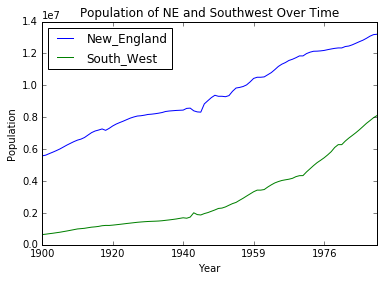

In [347]:
ax = df[["New_England", "South_West"]].plot()
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Population of NE and Southwest Over Time")

<strong><p style="font-size:120%;">Question: </strong>What state showed the greatest change in population? Note that there is more than one way to quantify this

In [348]:
#this code is remove the regional columns
states_only = [re.match('^[A-Z][A-Z]$', i) is not None for i in df.columns.values]
states = []
for i,value in enumerate(states_only):
    if value:
        states.append(df.columns.values[i])

<strong><p style="font-size:120%;">Total Change in Population</strong>

In [349]:
popChange = {}
percentChange = {}

for state in states:
    popChange[state]=df[state].loc['1990'] - df[state].loc['1959']
    percentChange[state] = (df[state].loc['1990'] - df[state].loc['1959']) / (0.01 * df[state].loc['1959'])
    
popChange=pd.DataFrame(popChange, index=['Population Change']).transpose()
popChange.drop('US', axis=0, inplace=True)
popChange.sort_values(by=['Population Change'], ascending=[False]).head()

,Population Change
CA,14293021.0
FL,8129926.0
TX,7581510.0
GA,2610216.0
AZ,2404228.0


In [350]:
popChangeDF=pd.DataFrame(percentChange, index=["Population % Change"]).transpose()
popChangeDF.drop('US', axis=0, inplace=True)
popChangeDF.sort_values(by=['Population % Change'], ascending=[False]).head()

,Population % Change
NV,330.764516
AZ,190.660428
FL,169.091639
AK,145.554911
UT,98.028736


<h2 align="center"> Problem 3</h2><br>

<h2 align="center"> Problem 4</h2><br>

<strong><p style="font-size:120%;">Question: </strong>Build, plot and evaluate a decision tree on the wine dataset. Split the dat set into 75% for training and 25% for testing. Evaluate based on confusion matrix how well the model performed on training vs. testing. Document the steps taken.

In [351]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np

In [352]:
#Downloading the dataset
!wget -O data/wine.data https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

#Information about the dataset     
!wget -O data/wine.names https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names

--2016-04-13 08:33:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: ‘data/wine.data’

data/wine.data      100%[=====================>]  10.53K  --.-KB/s   in 0.001s 

2016-04-13 08:33:04 (19.3 MB/s) - ‘data/wine.data’ saved [10782/10782]

--2016-04-13 08:33:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3036 (3.0K) [text/plain]
Saving to: ‘data/wine.names’

data/wine.names     100%[=====================>]   2.96K  --.-KB/s   in 0s     

2016-04-13 08:33:04 (8.80 MB/s

<strong><p style="font-size:120%;">Attributes of the Dataset</strong> 

1) Alcohol <br>
2) Malic acid <br>
3) Ash <br>
4) Alcalinity of ash <br>
5) Magnesium <br>
6) Total phenols <br>
7) Flavanoids <br> 
8) Nonflavanoid phenols <br>
9) Proanthocyanins <br> 
10) Color intensity <br> 
11) Hue <br> 
12) OD280/OD315 of diluted wines <br>
13) Proline <br>

In [353]:
wine = np.genfromtxt('wine.data', delimiter=',')
classes = wine[:, 0]
attributes = wine[:, 1:]
wine

array([[  1.00e+00,   1.42e+01,   1.71e+00, ...,   1.04e+00,   3.92e+00,
          1.06e+03],
       [  1.00e+00,   1.32e+01,   1.78e+00, ...,   1.05e+00,   3.40e+00,
          1.05e+03],
       [  1.00e+00,   1.32e+01,   2.36e+00, ...,   1.03e+00,   3.17e+00,
          1.18e+03],
       ..., 
       [  3.00e+00,   1.33e+01,   4.28e+00, ...,   5.90e-01,   1.56e+00,
          8.35e+02],
       [  3.00e+00,   1.32e+01,   2.59e+00, ...,   6.00e-01,   1.62e+00,
          8.40e+02],
       [  3.00e+00,   1.41e+01,   4.10e+00, ...,   6.10e-01,   1.60e+00,
          5.60e+02]])

In [354]:
#lets split into a test and training set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(attributes, classes, test_size=0.25, random_state=2)

In [355]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [356]:
clf.score(X_test, Y_test)

0.9555555555555556

<strong><p style="font-size:120%;">Confusion Matrix</strong>

In [357]:
# taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ["1", "2", "3"], rotation=45)
    plt.yticks(tick_marks, ["1", "2", "3"])
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Confusion matrix
[[17  2  0]
 [ 0 13  0]
 [ 0  0 13]]


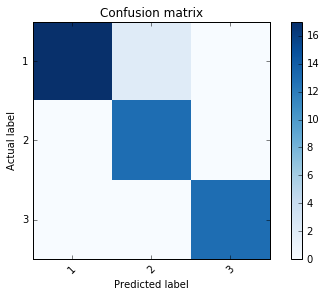

In [358]:
#  confusion matrix
from sklearn.metrics import confusion_matrix
y_true = Y_test
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()

In [359]:
attributes_names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
            'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
            'Hue', 'OD280/OD315 of diluted wines', 'Proline']
f = tree.export_graphviz(clf, out_file='workfile.dot', feature_names=attributes_names)

#graph = pydot.graph_from_dot_file('workfile.dot')
!dot -Tjpeg -o images/decisionTree.png -v workfile.dot

dot - graphviz version 2.38.0 (20140413.2041)
Using render: quartz:quartz
Using device: jpeg:quartz:quartz
libdir = "/Users/mgalarny/anaconda/lib/graphviz"
Activated plugin library: libgvplugin_dot_layout.6.dylib
Using layout: dot:dot_layout
The plugin configuration file:
	/Users/mgalarny/anaconda/lib/graphviz/config6
		was successfully loaded.
    render	:  dot fig gd map pic pov ps quartz svg tk vml vrml xdot
    layout	:  circo dot fdp neato nop nop1 nop2 osage patchwork sfdp twopi
    textlayout	:  textlayout
    device	:  bmp canon cgimage cmap cmapx cmapx_np dot eps exr fig gd gd2 gif gv icns ico imap imap_np ismap jp2 jpe jpeg jpg pct pdf pic pict plain plain-ext png pov ps ps2 psd sgi svg svgz tga tif tiff tk vml vmlz vrml wbmp xdot xdot1.2 xdot1.4
    loadimage	:  (lib) bmp eps gd gd2 gif jpe jpeg jpg pdf png ps svg xbm
pack info:
  mode   undefined
  size   0
  flags  0
  margin 8
pack info:
  mode   node
  size   0
  flags  0
fontname: unable to resolve "Times-Roman"
network

<img src = "images/decisionTree.png">

<h2 align="center"> Problem 5</h2><br>

In [360]:
dataset = pd.read_csv('data/AHW_1.csv')
dataset.head()

,Total,Sport,Age,Height,Weight,Sex
0,0,Judo,23,170.0,60.0,M
1,0,Athletics,33,193.0,125.0,M
2,0,Athletics,30,187.0,76.0,M
3,0,Boxing,24,NaN,NaN,M
4,0,Athletics,26,178.0,85.0,F


In [361]:
dataset.describe()

,Total,Age,Height,Weight
count,10384.000000,10384.000000,9823.000000,9104.000000
mean,0.052196,26.068856,176.907869,72.852812
std,0.250149,5.440561,11.295433,16.067462
min,0.000000,13.000000,132.000000,36.000000
25%,0.000000,22.000000,169.000000,61.000000
50%,0.000000,25.000000,177.000000,70.000000
75%,0.000000,29.000000,185.000000,81.000000
max,5.000000,71.000000,221.000000,218.000000


In [362]:
dataset.isnull().sum()

Total        0
Sport        0
Age          0
Height     561
Weight    1280
Sex          0
dtype: int64

            Total           Age       Height       Weight
count  5017.000000  5017.000000  5017.000000  5017.000000
mean      0.050628    26.770979   182.922464    80.593183
std       0.245835     5.548824     9.872117    15.400855
min       0.000000    15.000000   140.000000    42.000000
25%       0.000000    23.000000   176.000000    70.000000
50%       0.000000    26.000000   183.000000    78.000000
75%       0.000000    30.000000   190.000000    89.000000
max       5.000000    71.000000   221.000000   218.000000
            Total           Age       Height       Weight
count  4021.000000  4021.000000  4021.000000  4021.000000
mean      0.060433    25.855757   170.637404    63.208903
std       0.271496     5.303485     8.758611    10.802622
min       0.000000    13.000000   132.000000    36.000000
25%       0.000000    22.000000   165.000000    56.000000
50%       0.000000    25.000000   170.000000    62.000000
75%       0.000000    29.000000   176.000000    69.000000
max       4.00

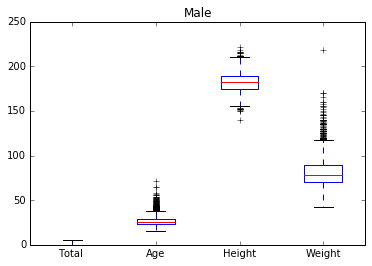

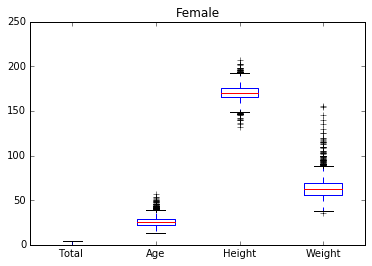

In [363]:

print dataset[dataset['Sex']=='M'].dropna().describe()
print dataset[dataset['Sex']=='F'].dropna().describe()

plt.figure()
dataset[dataset['Sex']=='M'].plot(kind='box', title='Male')
plt.figure()
dataset[dataset['Sex']=='F'].plot(kind='box', title='Female')

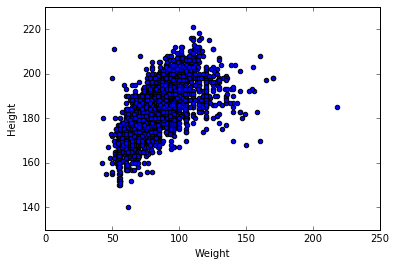

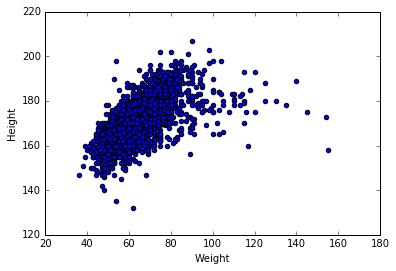

In [364]:
dataset[dataset['Sex']=='M'].plot(kind='scatter',x='Weight',y='Height')
dataset[dataset['Sex']=='F'].plot(kind='scatter',x='Weight',y='Height')

Height and wieght are not highly correlated for either gender.


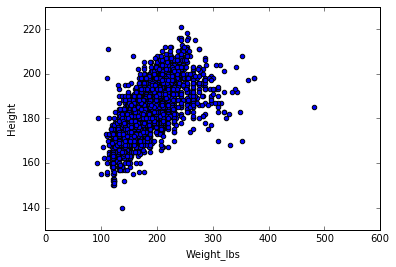

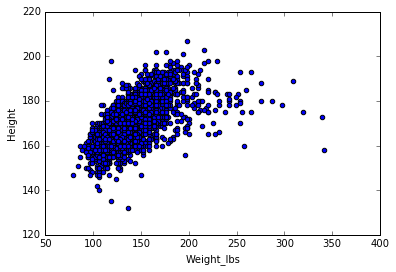

In [365]:
dataset['Weight_lbs'] = dataset['Weight']*2.20462
dataset[dataset['Sex']=='M'].plot(kind='scatter',x='Weight_lbs',y='Height')
dataset[dataset['Sex']=='F'].plot(kind='scatter',x='Weight_lbs',y='Height')

There is no significant difference in correlation due to the weight conversion.

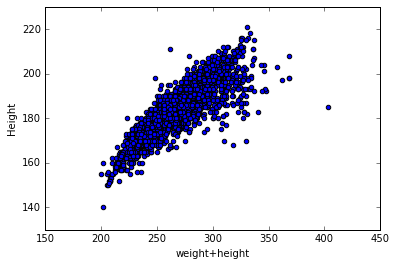

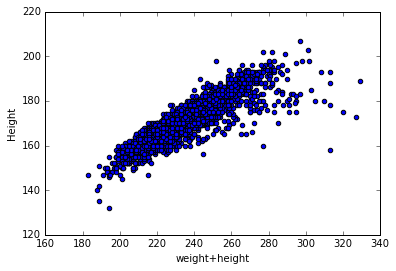

In [366]:
dataset = dataset.drop('Weight_lbs', 1)
dataset['weight+height'] = dataset['Weight']+dataset['Height']
dataset[dataset['Sex']=='M'].plot(kind='scatter',x='weight+height',y='Height')
dataset[dataset['Sex']=='F'].plot(kind='scatter',x='weight+height',y='Height')